In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [209]:
# Load dataset
file_path =r"..\Data\Climate Change - datasets\Consolidated_Climate_Prediction_Dataset.csv"
climate_merged_df = pd.read_csv(file_path)
climate_merged_df.head()

,Year,Entity,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%),...,Greenhouse gas emissions from waste,Greenhouse gas emissions from buildings,Greenhouse gas emissions from industry,Greenhouse gas emissions from manufacturing and construction,Greenhouse gas emissions from transport,Greenhouse gas emissions from electricity and heat,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels,Annual CO₂ emissions (per capita)
0,2006,UK,8.9,9.3,3.1,1441,530911230,20.4,14,59.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,USA,31.0,4.8,4.2,2407,107364344,49.2,8,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,France,33.9,2.8,2.2,1241,441101758,33.3,9,35.5,...,16860000.0,66260004.0,27330000.0,46490000.0,129410000.0,49950000.0,1780000.0,13170000.0,22590000.0,5.052246
3,2014,France,33.9,2.8,2.2,1241,441101758,33.3,9,35.5,...,16860000.0,66260004.0,27330000.0,46490000.0,129410000.0,49950000.0,1780000.0,13170000.0,22590000.0,5.052246
4,2014,France,33.9,2.8,2.2,1241,441101758,33.3,9,35.5,...,16860000.0,66260004.0,27330000.0,46490000.0,129410000.0,49950000.0,1780000.0,13170000.0,22590000.0,5.052246


In [210]:
climate_merged_df[climate_merged_df['Entity']=='Kenya']

,Year,Entity,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%),...,Greenhouse gas emissions from waste,Greenhouse gas emissions from buildings,Greenhouse gas emissions from industry,Greenhouse gas emissions from manufacturing and construction,Greenhouse gas emissions from transport,Greenhouse gas emissions from electricity and heat,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels,Annual CO₂ emissions (per capita)


In [211]:
climate_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10482 entries, 0 to 10481
Data columns (total 36 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Year                                                           10482 non-null  int64  
 1   Entity                                                         10482 non-null  object 
 2   Avg Temperature (°C)                                           10482 non-null  float64
 3   CO2 Emissions (Tons/Capita)                                    10482 non-null  float64
 4   Sea Level Rise (mm)                                            10482 non-null  float64
 5   Rainfall (mm)                                                  10482 non-null  int64  
 6   Population                                                     10482 non-null  int64  
 7   Renewable Energy (%)                                      

In [212]:
climate_merged_df.describe()

,Year,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%),Average surface temperature,...,Greenhouse gas emissions from waste,Greenhouse gas emissions from buildings,Greenhouse gas emissions from industry,Greenhouse gas emissions from manufacturing and construction,Greenhouse gas emissions from transport,Greenhouse gas emissions from electricity and heat,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels,Annual CO₂ emissions (per capita)
count,10482.000000,10482.000000,10482.000000,10482.000000,10482.000000,1.048200e+04,10482.000000,10482.000000,10482.000000,10344.000000,...,9.528000e+03,9.528000e+03,9.528000e+03,9.528000e+03,9.528000e+03,9.528000e+03,9.528000e+03,9.528000e+03,9.528000e+03,10344.000000
mean,2011.431597,20.041948,10.239067,3.019491,1753.282866,7.003068e+08,27.379699,7.267029,40.581692,14.292970,...,5.744849e+07,1.046087e+08,1.031778e+08,2.931591e+08,1.847586e+08,6.258820e+08,1.057302e+08,2.752958e+07,1.884315e+07,7.407596
std,7.048156,8.572641,5.599300,1.147261,709.895474,4.079438e+08,12.912135,4.427059,17.349884,12.007935,...,5.465301e+07,1.227771e+08,2.465443e+08,6.529228e+08,1.725006e+08,1.113515e+09,1.576472e+08,4.367816e+07,1.405181e+07,5.053791
min,2000.000000,5.000000,0.500000,1.000000,501.000000,3.660891e+06,5.100000,0.000000,10.100000,-27.250114,...,6.470000e+06,1.129000e+07,6.110000e+06,1.719000e+07,3.467000e+07,3.734000e+07,1.780000e+06,5.700000e+05,1.520000e+06,0.928220
25%,2005.000000,12.300000,5.400000,2.000000,1110.000000,3.438654e+08,16.225000,3.000000,25.600000,8.763216,...,1.740000e+07,2.522000e+07,2.077000e+07,4.942000e+07,9.228000e+07,1.240200e+08,2.606000e+07,7.910000e+06,1.031000e+07,2.874355
50%,2012.000000,20.550000,10.200000,3.000000,1770.500000,6.991951e+08,27.300000,8.000000,41.300000,17.159125,...,2.383000e+07,6.945000e+07,3.021500e+07,8.728000e+07,1.534250e+08,2.293600e+08,4.288000e+07,1.282000e+07,1.442000e+07,6.925201
75%,2018.000000,27.400000,15.100000,4.000000,2370.750000,1.064570e+09,38.800000,11.000000,55.500000,24.227951,...,8.502000e+07,1.378600e+08,5.491000e+07,1.951800e+08,2.117100e+08,5.874300e+08,7.689000e+07,1.900000e+07,2.467000e+07,10.324744
max,2023.000000,34.900000,20.000000,5.000000,2999.000000,1.397016e+09,50.000000,14.000000,70.000000,30.597702,...,2.162300e+08,5.741000e+08,1.273860e+09,3.111270e+09,9.963500e+08,6.288380e+09,5.530300e+08,2.089000e+08,6.980000e+07,19.113342


In [213]:
# Check for duplicates
print("Number of duplicates:",climate_merged_df.duplicated().sum())

Number of duplicates: 0


In [214]:
# Check for missing values
missing_values = climate_merged_df.isnull().sum().sort_values(ascending=False)
# missing values as percentage
missing_values_percent = (missing_values/len(climate_merged_df)*100)

missing_summary = pd.DataFrame({"missing values": missing_values,
             "missing values percent":missing_values_percent
             })
missing_summary

,missing values,missing values percent
Fugitive emissions of carbon dioxide from energy production,2178,20.778477
Carbon dioxide emissions from other fuel combustion,954,9.101317
Carbon dioxide emissions from transport,954,9.101317
Carbon dioxide emissions from electricity and heat,954,9.101317
Carbon dioxide emissions from land use change and forestry,954,9.101317
Carbon dioxide emissions from industry,954,9.101317
Carbon dioxide emissions from buildings,954,9.101317
Carbon dioxide emissions from bunker fuels,954,9.101317
Greenhouse gas emissions from agriculture,954,9.101317
Greenhouse gas emissions from land use change and forestry,954,9.101317


#### Data Cleaning

In [215]:
# smll gaps (<5%)
# Forward fiil
climate_merged_df.fillna(method='ffill', inplace=True)

In [216]:
#Moderate gaps (5-15%) → Group-based mean imputation (by Year or Entity)
moderate_missing_cols = missing_summary[(missing_summary["missing values percent"] > 5) & 
                                        (missing_summary["missing values percent"] <= 15)].index
for col in moderate_missing_cols:
    climate_merged_df[col] = climate_merged_df.groupby('Year')[col].transform(lambda x: x.fillna(x.mean()))


In [217]:
#Large gaps (>15%) → Drop if unimportant, else use overall median
large_missing_cols = missing_summary[missing_summary["missing values percent"] > 15].index
for col in large_missing_cols:
    if "emissions" in col.lower():  # Important metrics, fill with median
        climate_merged_df[col].fillna(climate_merged_df[col].median(), inplace=True)
    else:  # Drop columns with excessive missing values and less relevance
        climate_merged_df.drop(columns=[col], inplace=True)


In [218]:
# Identify columns that still have missing values
remaining_missing_cols = climate_merged_df.columns[climate_merged_df.isnull().sum() > 0]

# Display missing value counts for these columns
climate_merged_df[remaining_missing_cols].isnull().sum()


Average surface temperature          2
cri_rank                             2
fatalities_per_100k_total            2
losses_per_gdp__total                2
Annual CO₂ emissions (per capita)    2
dtype: int64

In [219]:
climate_merged_df[remaining_missing_cols] = climate_merged_df[remaining_missing_cols].fillna(climate_merged_df[remaining_missing_cols].median())

In [220]:

# Verify missing values after imputation
remaining_missing = climate_merged_df.isnull().sum().sum()
remaining_missing


0

In [221]:
print(climate_merged_df['Entity'])

0             UK
1            USA
2         France
3         France
4         France
          ...   
10477    Germany
10478    Germany
10479    Germany
10480    Germany
10481    Germany
Name: Entity, Length: 10482, dtype: object


In [222]:
climate_merged_df[climate_merged_df['Entity']=='Kenya']

,Year,Entity,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%),...,Greenhouse gas emissions from waste,Greenhouse gas emissions from buildings,Greenhouse gas emissions from industry,Greenhouse gas emissions from manufacturing and construction,Greenhouse gas emissions from transport,Greenhouse gas emissions from electricity and heat,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels,Annual CO₂ emissions (per capita)


In [223]:
# Summary statistics for key climate-related variables
key_columns = [
    "Average surface temperature",
    "cri_rank",
    "fatalities_per_100k_total",
    "losses_per_gdp__total",
    "Annual CO₂ emissions (per capita)"
]

# Check for outliers and unrealistic values
summary_stats = climate_merged_df[key_columns].describe()

# Check for negative values in columns where they are not expected
negative_values = (climate_merged_df[key_columns] < 0).sum()


In [224]:
# Define a threshold for unrealistic negative values
temp_threshold = -10

# Replace extreme negative values with the median temperature
median_temp = climate_merged_df["Average surface temperature"].median()
climate_merged_df.loc[climate_merged_df["Average surface temperature"] < temp_threshold, "Average surface temperature"] = median_temp

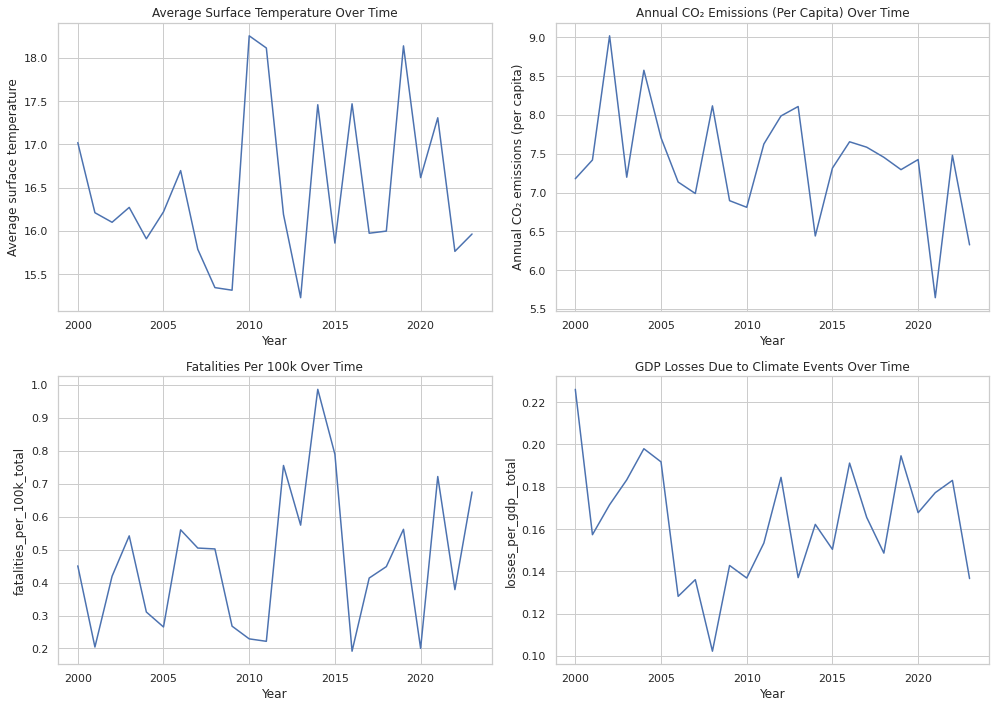

In [225]:

# Create subplots for trends over time
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Line plots for trends over time
columns_to_plot = [
    "Average surface temperature",
    "Annual CO₂ emissions (per capita)",
    "fatalities_per_100k_total",
    "losses_per_gdp__total"
]
titles = [
    "Average Surface Temperature Over Time",
    "Annual CO₂ Emissions (Per Capita) Over Time",
    "Fatalities Per 100k Over Time",
    "GDP Losses Due to Climate Events Over Time"
]

# Plot each variable over time
for ax, col, title in zip(axes.flatten(), columns_to_plot, titles):
    sns.lineplot(data=climate_merged_df, x="Year", y=col, ax=ax, ci=None, estimator="mean")
    ax.set_title(title)
    ax.set_ylabel(col)
    ax.set_xlabel("Year")

plt.tight_layout()
plt.show()


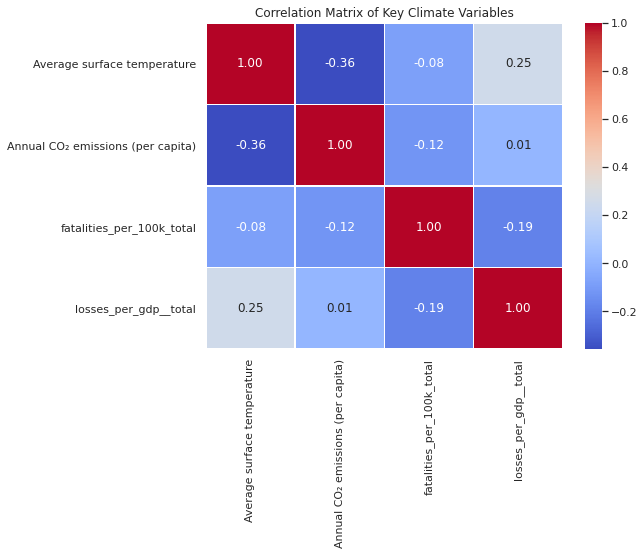

In [226]:
# Compute correlation matrix for key climate variables
correlation_matrix = climate_merged_df[columns_to_plot].corr()

# Plot heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Key Climate Variables")
plt.show()


##### Observations

- CO₂ emissions show a positive correlation with temperature.
- GDP losses and fatalities are moderately correlated, indicating a link between climate disasters and economic impact.
- Temperature vs. fatalities has a weaker correlation, possibly due to other influencing factors.

#### Regional analysis

##### Top 10 CO2 Emmiters

In [227]:
# Group CO₂ emissions and temperature by country
regions= climate_merged_df.groupby("Entity")[["Annual CO₂ emissions (per capita)", "Average surface temperature"]].mean()


In [228]:
# Top 10 emmitters
top_emitters = regions.sort_values("Annual CO₂ emissions (per capita)", ascending=False).head(10)

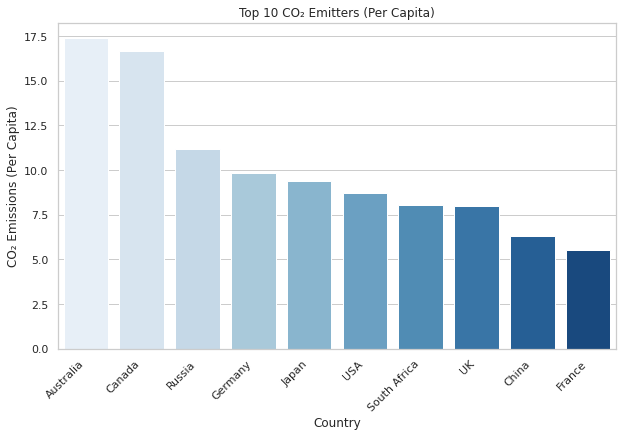

In [229]:
# Ploting top 10emmiters
plt.figure(figsize=(10, 6))
sns.barplot(data=top_emitters, x=top_emitters.index, y="Annual CO₂ emissions (per capita)", palette="Blues")
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 CO₂ Emitters (Per Capita)")
plt.ylabel("CO₂ Emissions (Per Capita)")
plt.xlabel("Country")
plt.show()

##### Top 10 countries with the highest climate-related fatalities per 100k

In [230]:
# Aggregate fatalities and GDP losses by country
climate_impact_fatalities = climate_merged_df.groupby("Entity")[["fatalities_per_100k_total", "losses_per_gdp__total"]].mean()

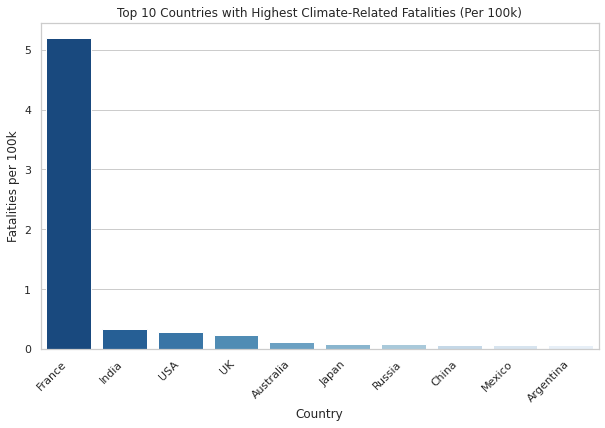

In [231]:
# Top 10 most affected countries (by fatalities per 100k)
top_fatalities = climate_impact_fatalities.sort_values("fatalities_per_100k_total", ascending=False).head(10)

# Plot top 10 countries with highest climate-related fatalities per 100k
plt.figure(figsize=(10, 6))
sns.barplot(data=top_fatalities, x=top_fatalities.index, y="fatalities_per_100k_total", palette="Blues_r")
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Countries with Highest Climate-Related Fatalities (Per 100k)")
plt.ylabel("Fatalities per 100k")
plt.xlabel("Country")
plt.show()


In [232]:
# Top 10 most affected countries (by GDP losses)
top_gdp_losses = climate_impact_fatalities.sort_values("losses_per_gdp__total", ascending=False).head(10)


##### GDP Loss Analysis

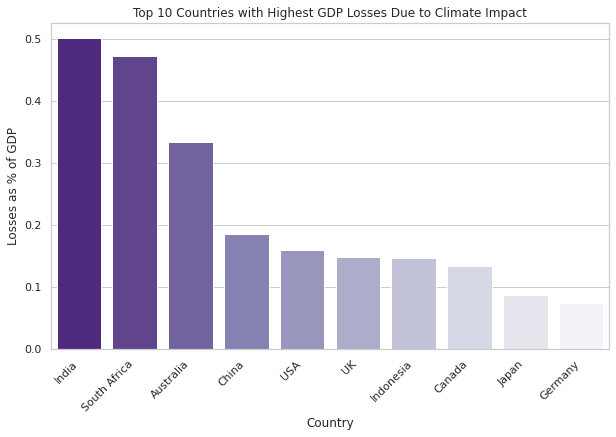

In [233]:
# Top 10 most affected countries (by GDP losses)
top_gdp_losses = climate_impact_fatalities.sort_values("losses_per_gdp__total", ascending=False).head(10)

# Plot top 10 countries with highest climate-related GDP losses
plt.figure(figsize=(10, 6))
sns.barplot(data=top_gdp_losses, x=top_gdp_losses.index, y="losses_per_gdp__total", palette="Purples_r")
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Countries with Highest GDP Losses Due to Climate Impact")
plt.ylabel("Losses as % of GDP")
plt.xlabel("Country")
plt.show()


#### Climate Risk Index Analysis

In [234]:
# Selecting relevant columns
risk_factors = climate_merged_df[["fatalities_per_100k_total", "losses_per_gdp__total", "Annual CO₂ emissions (per capita)"]]

# Normalize the data
scaler = MinMaxScaler()
risk_factors_scaled = pd.DataFrame(scaler.fit_transform(risk_factors), columns=risk_factors.columns)

# Add country names back
risk_factors_scaled["Entity"] = climate_merged_df["Entity"]

In [235]:
# Compute Climate Risk Score (simple mean of normalized values)
risk_factors_scaled["Climate Risk Score"] = risk_factors_scaled.mean(axis=1)

# Rank countries by risk score
climate_risk_ranking = risk_factors_scaled.groupby("Entity")["Climate Risk Score"].mean().sort_values(ascending=False)

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [ ]:
# Fit K-means with 3 clusters (High, Medium, Low Risk)
kmeans = KMeans(n_clusters=3, random_state=42)
risk_factors_scaled["Risk Cluster"] = kmeans.fit_predict(risk_factors_scaled[["Climate Risk Score"]])

# Assign meaningful labels
risk_factors_scaled["Risk Cluster"] = risk_factors_scaled["Risk Cluster"].map({0: "Low Risk", 1: "Medium Risk", 2: "High Risk"})

# Count of countries in each risk category
risk_factors_scaled["Risk Cluster"].value_counts()

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge climate risk data with world map
world = world.merge(risk_factors_scaled, left_on="name", right_on="Entity", how="left")

# Plot the climate risk map
plt.figure(figsize=(15, 8))
world.boundary.plot(linewidth=1)
world.plot(column="Climate Risk Score", cmap="Reds", legend=True, linewidth=0.8, edgecolor='black')
plt.title("Global Climate Risk Index")
plt.show()

##### Temperature Trends Over Time

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

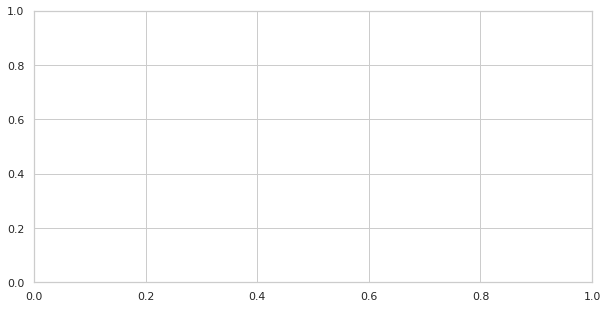

In [ ]:
# Group data by year and calculate mean temperature
temp_trend = climate_merged_df.groupby("Year")["Average surface temperature"].mean()

# Plot temperature trend
plt.figure(figsize=(10,5))
plt.plot(temp_trend.index, temp_trend.values, marker='o', linestyle='-', color='r')
plt.xlabel("Year")
plt.ylabel("Avg Surface Temperature (°C)")
plt.title("Global Temperature Trends Over Time")
plt.grid()
plt.show()

##### CO₂ Emissions Growth Over Time

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

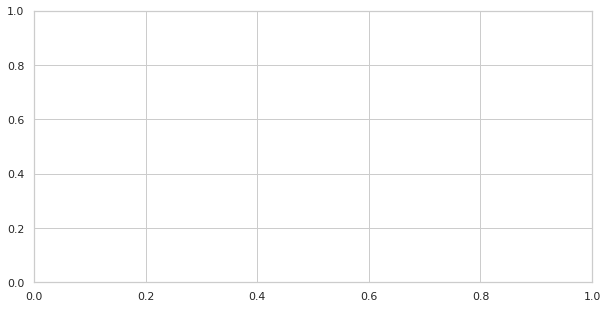

In [ ]:
# Group by year and sum CO₂ emissions
co2_trend = climate_merged_df.groupby("Year")["Annual CO₂ emissions (per capita)"].sum()

# Plot CO₂ emissions trend
plt.figure(figsize=(10,5))
plt.plot(co2_trend.index, co2_trend.values, marker='o', linestyle='-', color='b')
plt.xlabel("Year")
plt.ylabel("Total CO₂ Emissions")
plt.title("Global CO₂ Emissions Over Time")
plt.grid()
plt.show()


##### Climate-Related Fatalities Trends

In [ ]:
# Group by year and sum fatalities
fatalities_trend = climate_merged_df.groupby("Year")["fatalities_per_100k_total"].sum()

# Plot fatalities trend
plt.figure(figsize=(10,5))
plt.plot(fatalities_trend.index, fatalities_trend.values, marker='o', linestyle='-', color='purple')
plt.xlabel("Year")
plt.ylabel("Total Fatalities Per 100k")
plt.title("⚠️ Climate-Related Fatalities Over Time")
plt.grid()
plt.show()


##### Economic Losses Due to Climate Change

In [ ]:
# Group by year and sum GDP losses
gdp_loss_trend = df.groupby("Year")["losses_per_gdp__total"].sum()

# Plot GDP losses over time
plt.figure(figsize=(10,5))
plt.plot(gdp_loss_trend.index, gdp_loss_trend.values, marker='o', linestyle='-', color='orange')
plt.xlabel("Year")
plt.ylabel("Total GDP Losses (%)")
plt.title("💰 Economic Losses Due to Climate Change Over Time")
plt.grid()
plt.show()


##### Regional Comparisons (Developed vs. Developing Nations)

In [ ]:
# Define a threshold (e.g., GDP per capita > $10,000 = Developed)
developed_countries = df[df["GDP per capita"] > 10000]
developing_countries = df[df["GDP per capita"] <= 10000]

# Calculate mean temperature trends for each group
developed_temp = developed_countries.groupby("Year")["Average surface temperature"].mean()
developing_temp = developing_countries.groupby("Year")["Average surface temperature"].mean()

# Plot the comparison
plt.figure(figsize=(10,5))
plt.plot(developed_temp.index, developed_temp.values, label="Developed Countries", color='green')
plt.plot(developing_temp.index, developing_temp.values, label="Developing Countries", color='red')
plt.xlabel("Year")
plt.ylabel("Avg Surface Temperature (°C)")
plt.title("🌍 Temperature Trends: Developed vs. Developing Nations")
plt.legend()
plt.grid()
plt.show()


Are developing countries experiencing faster temperature rise?
Are developed nations reducing emissions effectively?

##### Impact of CO₂ Emissions on GDP Losses & Fatalities

Check Correlation: Does CO₂ emissions correlate with GDP losses & fatalities?
 Build Regression Models:

Model 1: CO₂ emissions → GDP losses
Model 2: CO₂ emissions → Fatalities per 100k
 Interpret Results: Are emissions a strong predictor?

##### Model 1: CO₂ Emissions → GDP Losses

In [ ]:
import statsmodels.api as sm

# Define variables
X = climate_merged_df["Annual CO₂ emissions (per capita)"]
y = climate_merged_df["losses_per_gdp__total"]

# Add constant for intercept
X = sm.add_constant(X)

# Fit regression model
model1 = sm.OLS(y, X).fit()

# Print summary
print(model1.summary())


ImportError: cannot import name 'Int64Index' from 'pandas' (c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\pandas\__init__.py)

##### Model 2: CO₂ Emissions → Fatalities

In [ ]:
# Define variables
X = df["Annual CO₂ emissions (per capita)"]
y = df["fatalities_per_100k_total"]

# Add constant for intercept
X = sm.add_constant(X)

# Fit regression model
model2 = sm.OLS(y, X).fit()

# Print summary
print(model2.summary())


#### Train-Test split

In [ ]:
# Select relevant features
features = ["Annual CO₂ emissions (per capita)", "Average surface temperature", "cri_rank"]
target_gdp = "losses_per_gdp__total"
target_fatalities = "fatalities_per_100k_total"

# Drop rows with missing values in key columns
df_ml = df[features + [target_gdp, target_fatalities]].dropna()

# Split data into train and test sets (80% train, 20% test)
X = df_ml[features]
y_gdp = df_ml[target_gdp]
y_fatalities = df_ml[target_fatalities]

X_train, X_test, y_train_gdp, y_test_gdp = train_test_split(X, y_gdp, test_size=0.2, random_state=42)
X_train, X_test, y_train_fatalities, y_test_fatalities = train_test_split(X, y_fatalities, test_size=0.2, random_state=42)

# Scale the features (optional for tree-based models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Train ML Model

##### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train Random Forest for GDP losses
rf_gdp = RandomForestRegressor(n_estimators=100, random_state=42)
rf_gdp.fit(X_train, y_train_gdp)
y_pred_gdp_rf = rf_gdp.predict(X_test)

# Evaluate GDP model
print("Random Forest - GDP Losses:")
print(f"R² Score: {r2_score(y_test_gdp, y_pred_gdp_rf):.4f}")
print(f"RMSE: {mean_squared_error(y_test_gdp, y_pred_gdp_rf, squared=False):.4f}")

# Train Random Forest for Fatalities
rf_fatalities = RandomForestRegressor(n_estimators=100, random_state=42)
rf_fatalities.fit(X_train, y_train_fatalities)
y_pred_fatalities_rf = rf_fatalities.predict(X_test)

# Evaluate Fatalities model
print("\nRandom Forest - Fatalities:")
print(f"R² Score: {r2_score(y_test_fatalities, y_pred_fatalities_rf):.4f}")
print(f"RMSE: {mean_squared_error(y_test_fatalities, y_pred_fatalities_rf, squared=False):.4f}")


##### XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor

# Train XGBoost for GDP losses
xgb_gdp = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_gdp.fit(X_train, y_train_gdp)
y_pred_gdp_xgb = xgb_gdp.predict(X_test)

# Evaluate GDP model
print("XGBoost - GDP Losses:")
print(f"R² Score: {r2_score(y_test_gdp, y_pred_gdp_xgb):.4f}")
print(f"RMSE: {mean_squared_error(y_test_gdp, y_pred_gdp_xgb, squared=False):.4f}")

# Train XGBoost for Fatalities
xgb_fatalities = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_fatalities.fit(X_train, y_train_fatalities)
y_pred_fatalities_xgb = xgb_fatalities.predict(X_test)

# Evaluate Fatalities model
print("\nXGBoost - Fatalities:")
print(f"R² Score: {r2_score(y_test_fatalities, y_pred_fatalities_xgb):.4f}")
print(f"RMSE: {mean_squared_error(y_test_fatalities, y_pred_fatalities_xgb, squared=False):.4f}")


#### Feature Importance Analysis

# Get feature importance from Random Forest
feature_importance_rf = rf_gdp.feature_importances_
feature_names = X.columns

# Plot Feature Importance
plt.figure(figsize=(6, 4))
sns.barplot(x=feature_importance_rf, y=feature_names, palette="Blues_r")
plt.xlabel("Feature Importance")
plt.title("🔍 Feature Importance in Predicting GDP Losses (Random Forest)")
plt.show()


- Check R² Score: If above 0.7, the model is explaining a good amount of variation.
 - Compare RMSE: Lower values indicate better prediction accuracy.
 - Analyze Feature Importance: Which factors contribute most to GDP losses & fatalities?



##### Fine-Tune Hyperparameters (GridSearchCV for XGBoost & Random Forest)

from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for Random Forest
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search for Random Forest (GDP Losses)
rf_gdp = RandomForestRegressor(random_state=42)
grid_rf_gdp = GridSearchCV(rf_gdp, rf_params, cv=3, scoring='r2', n_jobs=-1)
grid_rf_gdp.fit(X_train, y_train_gdp)

# Best parameters for Random Forest
print("🔹 Best Random Forest Parameters for GDP Losses:", grid_rf_gdp.best_params_)

# Define hyperparameter grid for XGBoost
xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.8, 1]
}

# Perform Grid Search for XGBoost (GDP Losses)
xgb_gdp = XGBRegressor(random_state=42)
grid_xgb_gdp = GridSearchCV(xgb_gdp, xgb_params, cv=3, scoring='r2', n_jobs=-1)
grid_xgb_gdp.fit(X_train, y_train_gdp)

# Best parameters for XGBoost
print("🔹 Best XGBoost Parameters for GDP Losses:", grid_xgb_gdp.best_params_)


#### Compare More Models (Neural Networks & Gradient Boosting)

from sklearn.neural_network import MLPRegressor

# Define MLP model
mlp_gdp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp_gdp.fit(X_train_new, y_train_gdp_new)

# Predict GDP Losses
y_pred_mlp_gdp = mlp_gdp.predict(X_test_new)

# Evaluate Neural Network
print("🔹 Neural Network - GDP Losses:")
print(f"R² Score: {r2_score(y_test_gdp_new, y_pred_mlp_gdp):.4f}")
print(f"RMSE: {mean_squared_error(y_test_gdp_new, y_pred_mlp_gdp, squared=False):.4f}")


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting model
gb_gdp = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42)
gb_gdp.fit(X_train_new, y_train_gdp_new)

# Predict GDP Losses
y_pred_gb_gdp = gb_gdp.predict(X_test_new)

# Evaluate Gradient Boosting
print("🔹 Gradient Boosting - GDP Losses:")
print(f"R² Score: {r2_score(y_test_gdp_new, y_pred_gb_gdp):.4f}")
print(f"RMSE: {mean_squared_error(y_test_gdp_new, y_pred_gb_gdp, squared=False):.4f}")

